                     Spot_Price
Datetime                       
2016-01-01 00:00:00    482000.0
2016-01-01 01:00:00    395000.0
2016-01-01 02:00:00    390000.0
2016-01-01 03:00:00    364051.0
2016-01-01 04:00:00    344910.0
...                         ...
2023-06-27 19:00:00    800142.0
2023-06-27 20:00:00    800142.0
2023-06-27 21:00:00    800142.0
2023-06-27 22:00:00    738395.0
2023-06-27 23:00:00    729142.0

[65112 rows x 1 columns]
404496.9005298651
146489.3457175926


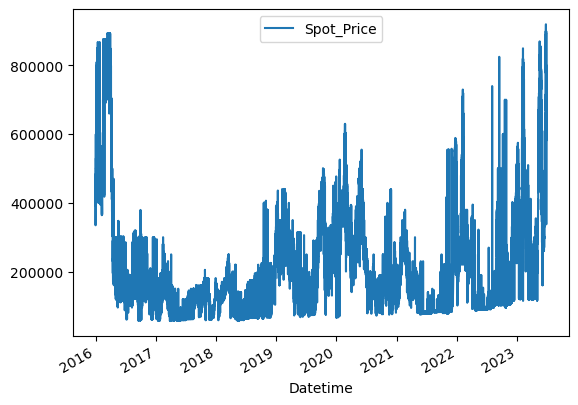

In [2]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
datos = pd.read_csv('C:/Users/USUARIO/Desktop/programacion/ada/adaclase2.csv', index_col=0, parse_dates=True)
print(datos)
datos.plot()

#datos['Spot_Price'].mean() #promedio
#datos['Spot_Price'].median() #mediana
#datos['Spot_Price'].std() #desviación estándar
#print(datos['Spot_Price'].std()/datos['Spot_Price'].mean())


#Q_75=np.percentile(datos['Spot_Price'].values,75)
#Q_25=np.percentile(datos['Spot_Price'].values,25)
#print(Q_75-Q_25)
#print((Q_75-Q_25)/datos['Spot_Price'].median())
#datos['Spot_Price'].quantile(.75)-datos['Spot_Price'].quantile(.25)
print(datos['Spot_Price']['2023'].mean())
print(datos['Spot_Price']['2021'].mean())



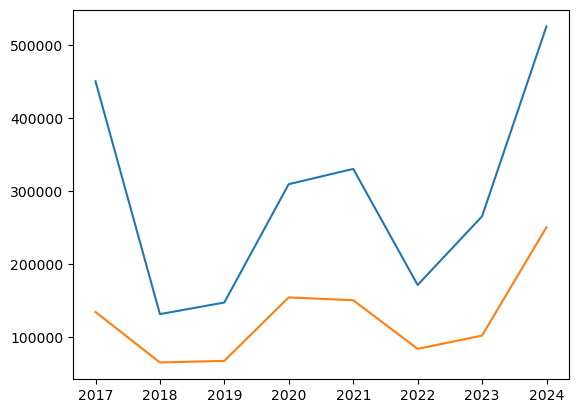

In [4]:
p=datos.resample('Y').quantile(0.75)
q=datos.resample('Y').quantile(0.25)
plt.plot(p)
plt.plot(q)

<Axes: title={'center': 'Valois'}, xlabel='Datetime'>

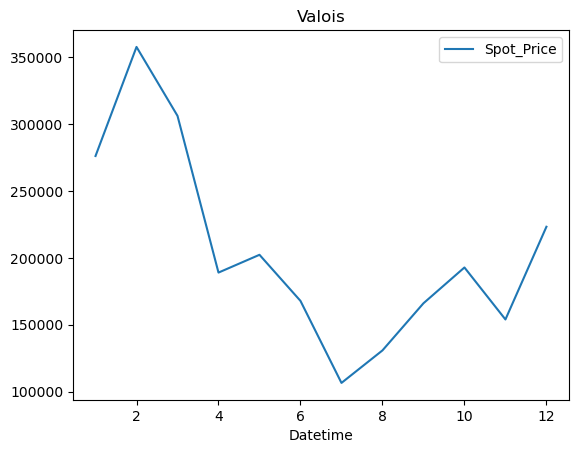

In [5]:
promedio=datos.groupby(datos.index.month).mean()
promedio.plot(title='Valois')


<Axes: xlabel='Datetime'>

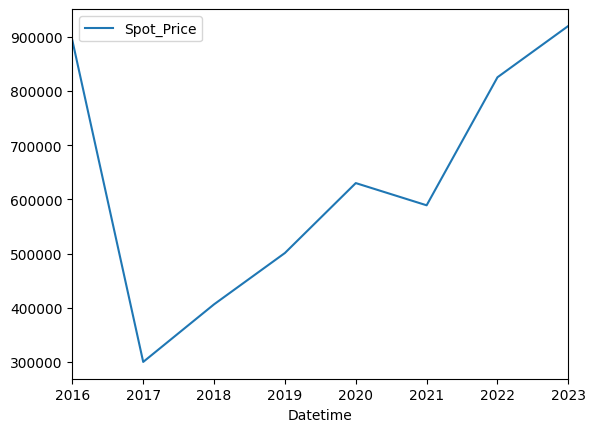

In [56]:
#resample es para cambiar la resolución de los datos, Y es anual, con el max nos saca el max de cada año
promedio=datos.resample("Y").max()
promedio.plot()


Text(0, 0.5, 'Precio de la energía [Kwh]')

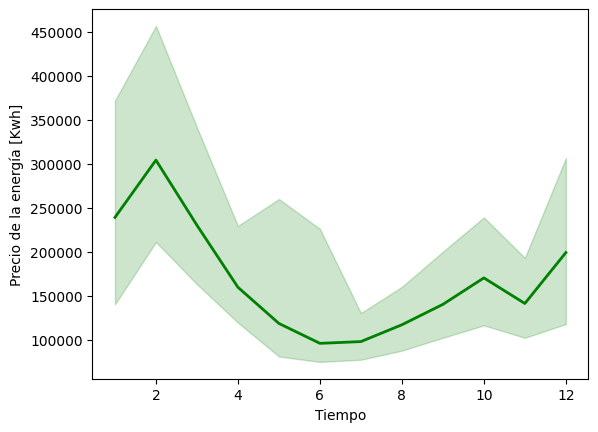

In [58]:
q_75=datos.groupby(datos.index.month).quantile(0.75)
q_25=datos.groupby(datos.index.month).quantile(0.25)
plt.fill_between(q_75.index,q_75['Spot_Price'],q_25['Spot_Price'],alpha=0.2, color="green")
plt.plot(datos.groupby(datos.index.month).median(),lw=2, color='green')
plt.xlabel("Meses del año")
plt.ylabel('Precio de la energía [Kwh]')


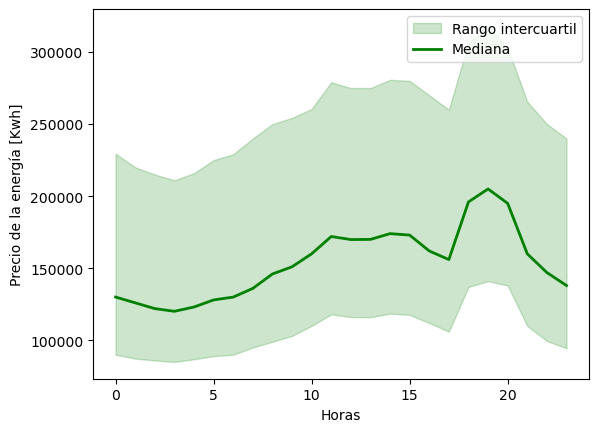

In [11]:
q_75=datos.groupby(datos.index.hour).quantile(0.75)
q_25=datos.groupby(datos.index.hour).quantile(0.25)
plt.fill_between(q_75.index,q_75['Spot_Price'],q_25['Spot_Price'],alpha=0.2, color="green", label='Rango intercuartil')
plt.plot(datos.groupby(datos.index.hour).median(),lw=2, color='green',label='Mediana')
plt.xlabel("Horas")
plt.ylabel('Precio de la energía [Kwh]')
plt.legend()

In [ ]:
#Ciclo anual del ciclo diurno, eje x meses, eje y 0 a 23, gráfica de colores, promedio de ciclo anual, promedio del ciclo diurno

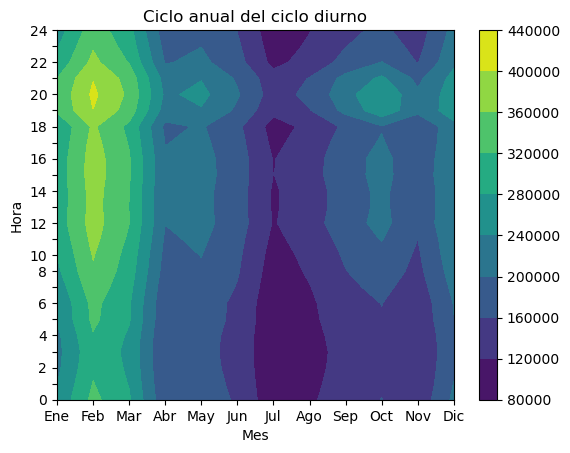

In [6]:
promedio= datos.groupby([datos.index.hour,datos.index.month])['Spot_Price'].mean()
matriz = promedio.unstack()
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
horas = ['0',' ','2',' ','4',' ','6',' ','8','10',' ','12',' ','14',' ','16',' ','18',' ','20',' ','22',' ','24']
plt.contourf(matriz)
plt.xticks(np.arange(len(meses)), meses)
plt.xlabel("Mes")
plt.yticks(np.arange(len(horas)), horas)
plt.ylabel('Hora')
plt.title('Ciclo anual del ciclo diurno')
plt.colorbar()


Datetime  Datetime
0         1           248252.657258
          2           330423.231111
          3           284343.779592
          4           169255.372385
          5           186536.146341
                          ...      
23        8           118403.546296
          9           150452.480952
          10          168228.731481
          11          138779.409524
          12          212445.320755
Name: Spot_Price, Length: 288, dtype: float64


NameError: name 'calendar' is not defined

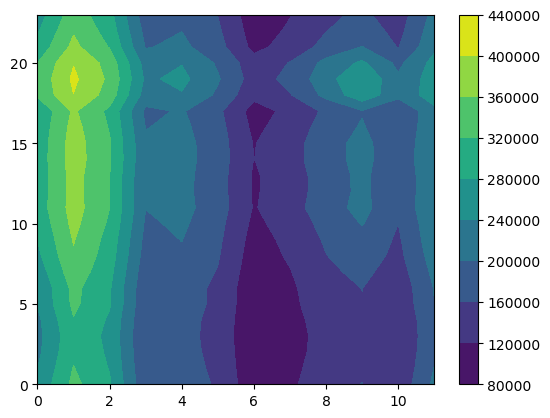

In [25]:
promedio = datos.groupby([datos.index.hour, datos.index.month])['Spot_Price'].mean()
print(promedio)
matriz_promedios = promedio.unstack()


plt.contourf(matriz_promedios)
plt.colorbar()

meses = [calendar.month_abbr[i+1] for i in range(12)]  # Obtener los nombres de los meses
plt.xticks(np.arange(0, 12), meses)  # Establecer las etiquetas del eje y como nombres de los meses


plt.title("Promedios del ciclo anual del ciclo diurno")
plt.ylabel("Horas")
plt.xlabel("Meses")